# Linear Regression
Linear regression is a statistical method used to model the relationship between a dependent variable (often denoted as
y) and one or more independent variables (often denoted as X). It assumes a linear relationship between the independent variable(s) and the dependent variable.

In simple linear regression, there is only one independent variable, while in multiple linear regression, there are multiple independent variables. The relationship between the independent variable(s) and the dependent variable is represented by a linear equation of the form:

y = β₀ + β₁X₁ + β₂X₂ + ... + βₙXₙ + ϵ


*   y is the dependent variable.
*   X₁,X₂, ... ,Xₙ are the independent variables.
*   β₀, β₁, β₂, .... , βₙ are the coefficients (parameters) of the model.
*   ϵ is the error term representing the variability in the dependent variable that is not explained by the independent variables.


#  Type of Regression
**Simple Linear Regression:** This type involves only one independent variable. The equation takes the form β₀ + β₁X + ϵ where, X is the independent variable.

**Multiple Linear Regression:** In this type, there are multiple independent variables. The equation is extended to accommodate multiple predictors, such as
y = β₀ + β₁X₁ + β₂X₂ + ... + βₙXₙ + ϵ

**Polynomial Regression:** Polynomial regression is a form of regression analysis in which the relationship between the independent variable
X and the dependent variable y is modeled as an n-th degree polynomial. The equation takes the form : y = β₀ + β₁X + β₂X² + ... + βₙXⁿ + ϵ

**Ridge Regression:** Ridge regression is a regularized version of linear regression that adds a penalty term to the cost function, which helps to reduce overfitting. It minimizes the sum of squared residuals along with the magnitude of the coefficients.

**Lasso Regression:** Lasso regression is another regularized version of linear regression that uses the L1 norm penalty term. It tends to produce sparse models by setting some coefficients to zero, effectively performing feature selection.

**ElasticNet Regression:** ElasticNet regression is a hybrid of Ridge and Lasso regression, combining both L1 and L2 penalties. It addresses some limitations of Lasso regression such as the tendency to select only one variable among highly correlated variables.

**Logistic Regression:** Despite its name, logistic regression is a type of regression analysis used for predicting the probability of a binary outcome. It models the relationship between one or more independent variables and a binary dependent variable using the logistic function.


In [1]:
import numpy as np
# Creating a sample dataset
np.random.seed(0)
X = 2 * np.random.rand(1000, 1)  # Generate 100 random numbers between 0 and 2
y = 3 * X + 4 + np.random.randn(1000, 1)  # Create y values with some random noise


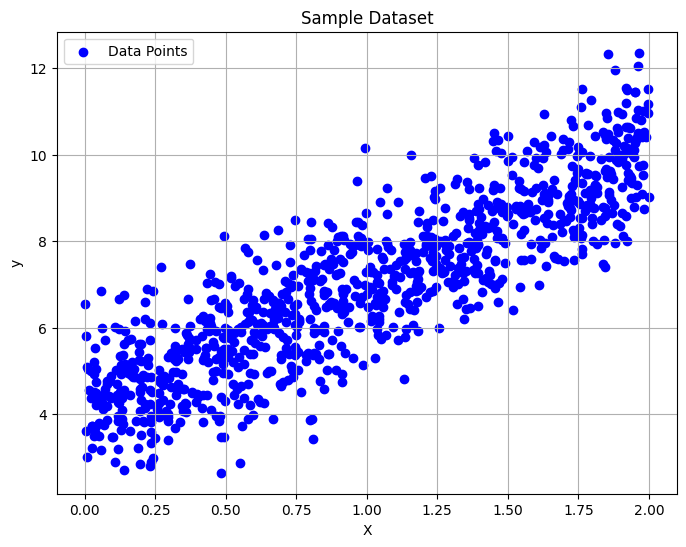

In [2]:
import matplotlib.pyplot as plt
# Plotting the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Data Points')
plt.title('Sample Dataset')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
X_train.shape

(800, 1)

In [6]:
X_test.shape

(200, 1)

In [7]:
y_train.reshape(-1).shape

(800,)

# Creating the Simple Linear Regression Class

In [8]:
class SimpleLinearRegression:
    def __init__(self):
        self.coefficient = None
        self.intercept = None

    def fit(self, X, y):
        # Compute the mean of X and y
        mean_x = np.mean(X)
        mean_y = np.mean(y)

        # Calculate the slope (beta1) and intercept (beta0)
        numerator = np.sum((X - mean_x) * (y - mean_y))
        denominator = np.sum((X - mean_x) ** 2)
        self.coefficient = numerator / denominator
        self.intercept = mean_y - self.coefficient * mean_x

    def predict(self, X):
        # Predict y values using the linear equation
        return self.intercept + self.coefficient * X


In [9]:
# Create an instance of the SimpleLinearRegression class
model = SimpleLinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_our_model = model.predict(X_test)


In [10]:
model.coefficient

2.9129225874154465

In [11]:
model.intercept

4.105855499504096

# Check the Normality of errors:
The errors (residuals) should be normally distributed. This assumption ensures that the estimates of the regression coefficients are unbiased and efficient.

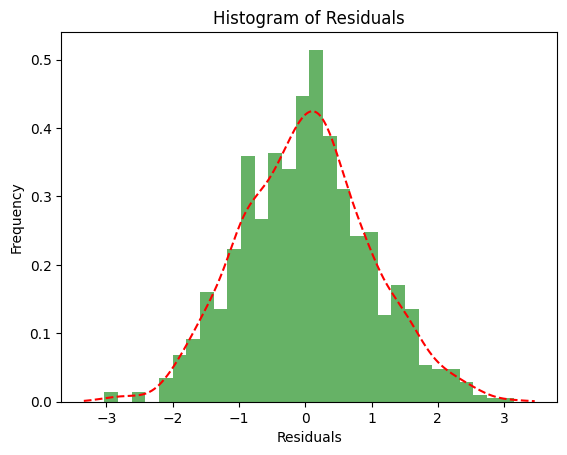

Shapiro-Wilk Test:
Statistic: 0.9981347322463989, p-value: 0.3437226414680481
The residuals appear to be normally distributed (fail to reject H0)


In [27]:
from scipy import stats

# Obtain residuals
residuals = y - model.predict(X)

# Plot a histogram of residuals
plt.hist(residuals, bins=30, density=True, alpha=0.6, color='g')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# Plot density line
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
density = stats.gaussian_kde(residuals.flatten())
plt.plot(x, density(x), 'r--')

plt.show()

# Perform Shapiro-Wilk test for normality
stat, p = stats.shapiro(residuals.flatten())  # Flatten residuals to 1D array for the test
print('Shapiro-Wilk Test:')
print(f'Statistic: {stat}, p-value: {p}')
if p > 0.05:
    print("The residuals appear to be normally distributed (fail to reject H0)")
else:
    print("The residuals do not appear to be normally distributed (reject H0)")



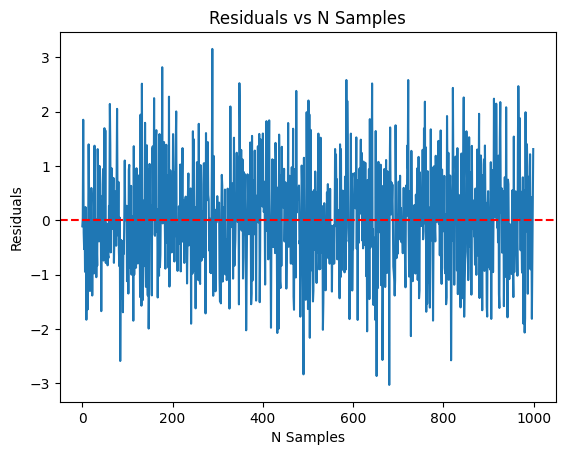

In [28]:
# Plot residuals vs N samples
plt.plot(range(len(residuals)), residuals)
plt.title('Residuals vs N Samples')
plt.xlabel('N Samples')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.show()

## Linear Regression Using Scikit Learn Library

In [12]:
from sklearn.linear_model import LinearRegression

# Fit the scikit-learn LinearRegression model
sklearn_model = LinearRegression()
sklearn_model.fit(X_train, y_train)

# Get the coefficients and intercept from the scikit-learn model
sklearn_coefficient = sklearn_model.coef_[0][0]
sklearn_intercept = sklearn_model.intercept_[0]

# Print the coefficients and intercept obtained from scikit-learn
print("Scikit-learn Coefficient:", sklearn_coefficient)
print("Scikit-learn Intercept:", sklearn_intercept)


Scikit-learn Coefficient: 2.912922587415447
Scikit-learn Intercept: 4.105855499504095


In [13]:
# Make predictions using the scikit-learn model
y_pred_sklearn = sklearn_model.predict(X_test)

In [14]:
# Validate the results by comparing with our SimpleLinearRegression model
print("Difference in Coefficient:", model.coefficient - sklearn_coefficient)
print("Difference in Intercept:", model.intercept - sklearn_intercept)

Difference in Coefficient: -4.440892098500626e-16
Difference in Intercept: 8.881784197001252e-16


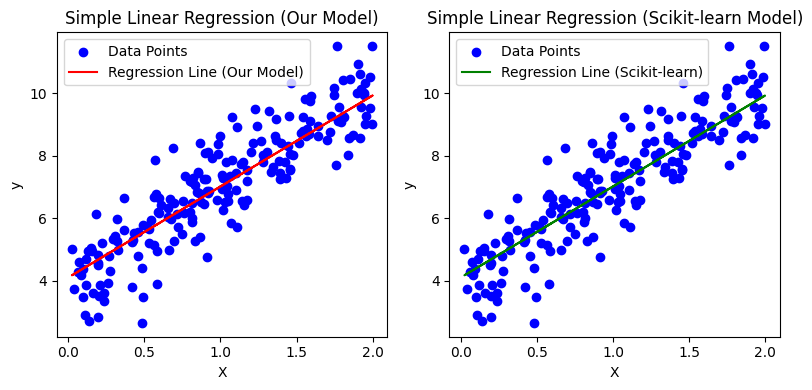

In [15]:
import matplotlib.pyplot as plt

# Create subplots
plt.figure(figsize=(8, 4))

# Plotting the regression line from our SimpleLinearRegression model
plt.subplot(1, 2, 1)
plt.scatter(X_test, y_test, color='blue', label='Data Points')
plt.plot(X_test, y_pred_our_model, color='red', label='Regression Line (Our Model)')
plt.title('Simple Linear Regression (Our Model)')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

# Plotting the regression line from the scikit-learn model
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='blue', label='Data Points')
plt.plot(X_test, y_pred_sklearn, color='green', label='Regression Line (Scikit-learn)')
plt.title('Simple Linear Regression (Scikit-learn Model)')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

# Displaying the plot
plt.tight_layout()
plt.show()


# Different Linear Regression Evaluation Matrics

In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

**Mean Squared Error (MSE):** MSE is the average of the squared differences between the predicted values and the actual values. It gives more weight to large errors. The formula for MSE is:

MSE = 1/n * Σ(yᵢ - ŷᵢ)²

In [17]:
# Calculate mean squared error
mse_our_model = mean_squared_error(y_test, y_pred_our_model)
mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)
print("Mean Squared Error (Our Model):", mse_our_model)
print("Mean Squared Error (Scikit-learn):", mse_sklearn)

Mean Squared Error (Our Model): 0.7778979446150527
Mean Squared Error (Scikit-learn): 0.7778979446150527


**Root Mean Squared Error (RMSE):** RMSE is the square root of the MSE. It is more interpretable as it is in the same unit as the target variable. The formula for RMSE is:

RMSE = √(1/n * Σ(yᵢ - ŷᵢ)²)


In [18]:
# Calculate root mean squared error
rmse_our_model =np.sqrt(mean_squared_error(y_test, y_pred_our_model))
rmse_sklearn = np.sqrt(mean_squared_error(y_test, y_pred_sklearn))
print("Root Mean Squared Error (Our Model):", rmse_our_model)
print("Root Mean Squared Error (Scikit-learn):", rmse_sklearn)

Root Mean Squared Error (Our Model): 0.8819852292499306
Root Mean Squared Error (Scikit-learn): 0.8819852292499306


**Mean Absolute Error (MAE):** MAE is the average of the absolute differences between the predicted values and the actual values. It is less sensitive to outliers compared to MSE. The formula for MAE is:

MAE = 1/n * Σ|yᵢ - ŷᵢ|

In [19]:
# Calculate mean absolute error
mae_our_model = mean_absolute_error(y_test, y_pred_our_model)
mae_sklearn = mean_absolute_error(y_test, y_pred_sklearn)
print("Mean Absolute Error (Our Model):", mae_our_model)
print("Mean Absolute Error (Scikit-learn):", mae_sklearn)

Mean Absolute Error (Our Model): 0.6817035186100168
Mean Absolute Error (Scikit-learn): 0.6817035186100169


**R-squared (R²) Score:** R-squared represents the proportion of variance in the dependent variable that is explained by the independent variables. It ranges from 0 to 1, where 1 indicates a perfect fit. The formula for R-squared is:

R² = 1 - (Σ(yᵢ - ȳ)² / Σ(yᵢ - ŷᵢ)²)

where,

*   n is the number of data points.
*   yᵢ represents the actual value of the dependent variable for the ᵢth
data point.
*   ȳ represents the mean of the dependent variable y
*   ŷᵢ represents the predicted value of the dependent variable for the ᵢth
data point.
*   The symbol Σ denotes the sum from *i* = 1 to n

R² is the coefficient of determination, which represents the proportion of the variance in the dependent variable that is predictable from the independent variable(s). It ranges from 0 to 1, where 1 indicates a perfect fit and 0 indicates no relationship between the independent and dependent variables.


In [20]:
# Calculate mean absolute error
r2_our_model = r2_score(y_test, y_pred_our_model)
r2_sklearn = r2_score(y_test, y_pred_sklearn)
print("R2 (Our Model):", r2_our_model)
print("R2 (Scikit-learn):", r2_sklearn)

R2 (Our Model): 0.7963781355012189
R2 (Scikit-learn): 0.7963781355012189
